
1. Записать видео где находится минимум 2 человека желательно в полный рост. В конце когда видео закончиться отобразить движение людей.

2. Записать видео где движется машина. В конце когда видео закончиться отобразить движение машины.

3. Записать видео где движется мяч(камера статична). В конце когда видео закончиться отобразить движение мяча.

Использовать различные алгоритмы и написать краткий репорт о работе каждого алгоритма(указать лучший

# Tracking APIs ( Built-in with OpenCV)

In [1]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import time

In [2]:
def ask_for_tracker():
    print("Welcome! What Tracker API would you like to use?")
    print("Enter 0 for BOOSTING: ")
    print("Enter 1 for MIL: ")
    print("Enter 2 for KCF: ")
    print("Enter 3 for TLD: ")
    print("Enter 4 for MEDIANFLOW: ")
    choice = input("Please select your tracker: ")
    
    if choice == '0':
        tracker = cv2.TrackerBoosting_create()
    if choice == '1':
        tracker = cv2.TrackerMIL_create()
    if choice == '2':
        tracker = cv2.TrackerKCF_create()
    if choice == '3':
        tracker = cv2.TrackerTLD_create()
    if choice == '4':
        tracker = cv2.TrackerMedianFlow_create()


    return tracker
 

## tracker = ask_for_tracker()

In [3]:
tracker = ask_for_tracker()

Welcome! What Tracker API would you like to use?
Enter 0 for BOOSTING: 
Enter 1 for MIL: 
Enter 2 for KCF: 
Enter 3 for TLD: 
Enter 4 for MEDIANFLOW: 


Please select your tracker:  1


# 1

Welcome! What Tracker API would you like to use?
Enter 0 for BOOSTING: 
Enter 1 for MIL: 
Enter 2 for KCF: 
Enter 3 for TLD: 
Enter 4 for MEDIANFLOW: 


Please select your tracker:  1


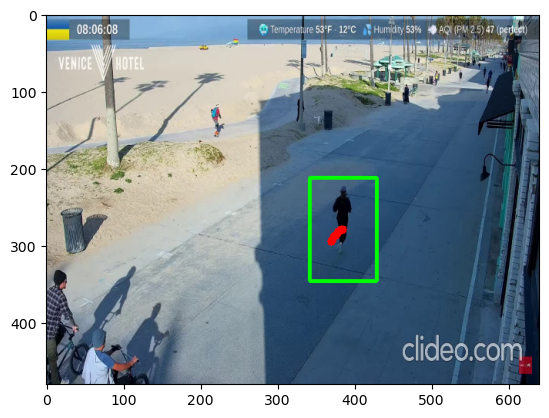

In [6]:
tracker = ask_for_tracker()
tracker_name = str(tracker).split()[0][1:]

# Read video
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('C:\\Users\\aliha\\Desktop\\Third\\Computer Vision\\DATA\\human.mp4')
if (cap.isOpened()== False): 
    print("Error opening video stream or file")
ret, frame = cap.read()
frame = cv2.resize(frame, (640, 480))
# Special function allows us to draw on the very first frame our desired ROI
roi = cv2.selectROI(frame, False)
fps = 10
# Initialize tracker with first frame and bounding box
ret = tracker.init(frame, roi)
X = []
Y = []
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('people.avi', fourcc, 20.0, (640,  480))
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
    # Update tracker
        frame = cv2.resize(frame, (640, 480))
        # time.sleep(1/fps)
        success, roi = tracker.update(frame)
        time.sleep(1/fps)
        
        # roi variable is a tuple of 4 floats
        # We need each value and we need them as integers
        (x,y,w,h) = tuple(map(int,roi))

        # Draw Rectangle as Tracker moves4
        if success:
            # Tracking success
            p1 = (x, y)
            p2 = (x+w, y+h)
            X.append(x + w//2) #(x + ((x + w) - x)/2)
            Y.append(y + h//2)
            # print(p1, p2)
            # print((x+w)//2, (y+h)//2)
            cv2.rectangle(frame, p1, p2, (0,255,0), 3)
            
        else :
            # Tracking failure
            cv2.putText(frame, "Failure to Detect Tracking!!", (100,200), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,255),3)

        # Display tracker type on frame
        cv2.putText(frame, tracker_name, (20,400), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0),3);
        # Display result
        for i in range(len(X)):
            cv2.circle(frame,(X[i],Y[i]),5,(0,0,255),-1)
        out.write(frame)
        cv2.imshow(tracker_name, frame)
        last_frame = frame
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
for i, j in zip(X, Y):
    cv2.circle(last_frame, (i, j), 5, (0,0,255),-1)
last_frame = cv2.cvtColor(last_frame, cv2.COLOR_BGR2RGB)
plt.imshow(last_frame)
cap.release()
cv2.destroyAllWindows()

# 2

In [ ]:
tracker = ask_for_tracker()
tracker_name = str(tracker).split()[0][1:]

# Read video
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('C:\\Users\\aliha\\Desktop\\Third\\Computer Vision\\DATA\\car.mp4')
if (cap.isOpened()== False): 
    print("Error opening video stream or file")
ret, frame = cap.read()
frame = cv2.resize(frame, (640, 480))
# Special function allows us to draw on the very first frame our desired ROI
roi = cv2.selectROI(frame, False)
fps = 60
# Initialize tracker with first frame and bounding box
ret = tracker.init(frame, roi)
X = []
Y = []
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('car.avi', fourcc, 20.0, (640,  480))
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
    # Update tracker
        frame = cv2.resize(frame, (640, 480))
        time.sleep(1/fps)
        success, roi = tracker.update(frame)
        
        # roi variable is a tuple of 4 floats
        # We need each value and we need them as integers
        (x,y,w,h) = tuple(map(int,roi))

        # Draw Rectangle as Tracker moves4
        if success:
            # Tracking success
            p1 = (x, y)
            p2 = (x+w, y+h)
            if(x > 0 and y > 0 and x + w < 638 and  y + h < 478):
                
                X.append(x + w//2) #(x + ((x + w) - x)/2)
                Y.append(y + h//2)
                # print(p1, p2)
                # print((x+w)//2, (y+h)//2)
                cv2.rectangle(frame, p1, p2, (0,255,0), 3)    
        
        # Display tracker type on frame
        cv2.putText(frame, tracker_name, (20,400), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0),3);
        # Display result
        for i in range(len(X)):
            cv2.circle(frame,(X[i],Y[i]),5,(0,0,255),-1)
        out.write(frame)
        cv2.imshow(tracker_name, frame)
     
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    last_frame = frame
    
for i, j in zip(X, Y):
    cv2.circle(last_frame, (i, j), 5, (0,0,255),-1)
last_frame = cv2.cvtColor(last_frame, cv2.COLOR_BGR2RGB)
plt.imshow(last_frame)
cap.release()
cv2.destroyAllWindows()

Welcome! What Tracker API would you like to use?
Enter 0 for BOOSTING: 
Enter 1 for MIL: 
Enter 2 for KCF: 
Enter 3 for TLD: 
Enter 4 for MEDIANFLOW: 


# 3

Welcome! What Tracker API would you like to use?
Enter 0 for BOOSTING: 
Enter 1 for MIL: 
Enter 2 for KCF: 
Enter 3 for TLD: 
Enter 4 for MEDIANFLOW: 


Please select your tracker:  1


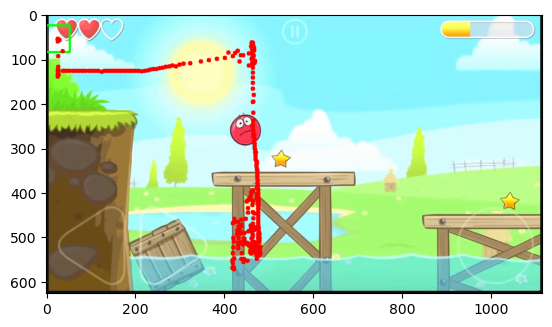

In [12]:
tracker = ask_for_tracker()
tracker_name = str(tracker).split()[0][1:]

# Read video
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('C:\\Users\\aliha\\Desktop\\Third\\Computer Vision\\DATA\\balls.mp4')
if (cap.isOpened()== False): 
    print("Error opening video stream or file")
ret, frame = cap.read()

# Special function allows us to draw on the very first frame our desired ROI
roi = cv2.selectROI(frame, False)

# Initialize tracker with first frame and bounding box
ret = tracker.init(frame, roi)
X = []
Y = []
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('1.avi', fourcc, 20.0, (640,  480))
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
    # Update tracker
        success, roi = tracker.update(frame)

        # roi variable is a tuple of 4 floats
        # We need each value and we need them as integers
        (x,y,w,h) = tuple(map(int,roi))

        # Draw Rectangle as Tracker moves4
        if success:
            # Tracking success
            p1 = (x, y)
            p2 = (x+w, y+h)
            X.append(x + w//2) #(x + ((x + w) - x)/2)
            Y.append(y + h//2)
            # print(p1, p2)
            # print((x+w)//2, (y+h)//2)
            cv2.rectangle(frame, p1, p2, (0,255,0), 3)
            
        else :
            # Tracking failure
            cv2.putText(frame, "Failure to Detect Tracking!!", (100,200), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,0,255),3)
        last_frame = frame
            
        # Display tracker type on frame
        cv2.putText(frame, tracker_name, (20,400), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0),3);
        # Display result
        for i in range(len(X)):
            cv2.circle(frame,(X[i],Y[i]),5,(0,0,255),-1)
            
        out.write(frame)
        cv2.imshow(tracker_name, frame)
    
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
for i, j in zip(X, Y):
    cv2.circle(last_frame, (i, j), 5, (0,0,255),-1)
last_frame = cv2.cvtColor(last_frame, cv2.COLOR_BGR2RGB)
plt.imshow(last_frame)
cap.release()
out.release()
cv2.destroyAllWindows()

In [12]:
import cv2
import time
background = cv2.imread("background2.png")
background = cv2.cvtColor(background,cv2.COLOR_BGR2GRAY)
background = cv2.GaussianBlur(background,(21,21),0)
fps = 60
video = cv2.VideoCapture("test3.avi")

while True:
    time.sleep(1/fps)
    status, frame = video.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray,(21,21), 0)

    diff = cv2.absdiff(background,gray)

    thresh = cv2.threshold(diff,30,255,cv2.THRESH_BINARY)[1]
    thresh = cv2.dilate(thresh, None, iterations = 2)

    cnts,res = cv2.findContours(thresh.copy(),
        cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in cnts:
        if cv2.contourArea(contour) < 20000:
            continue
        (x,y,w,h) = cv2.boundingRect(contour)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0), 3)

    cv2.imshow("All Contours",frame)

    # cv2.imshow("Threshold Video",thresh)

    # cv2.imshow("Diff Video",diff)
    # cv2.imshow("Gray Video",gray)

    key = cv2.waitKey(1)
    if key == ord('q'):
        break

video.release()
cv2.destroyAllWindows()
